In [1]:
# Import necessary packages
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dateutil.parser import parse
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

2022-01-11 02:16:33.998005: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-01-11 02:16:33.998028: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
# Read the dataset as a pandas dataframe
df = pd.read_csv("data.csv")

# Display the first 10 rows
df.head(10)

,timestamp,mq7,mq135,temperature,humidity
0,1639922725,162.0,39.0,24.1,73.0
1,1639923325,135.0,38.0,23.9,75.0
2,1639923927,118.0,36.0,24.0,72.0
3,1639924555,109.0,39.0,24.4,73.0
4,1639925428,102.0,42.0,24.2,74.0
5,1639926056,100.0,42.0,24.2,76.0
6,1639926658,97.0,40.0,24.2,75.0
7,1639927411,96.0,37.0,24.0,77.0
8,1639928191,92.0,37.0,23.9,77.0
9,1639928791,92.0,37.0,23.9,77.0


In [3]:
# Converting the unix time stamp to datetime format
df["timestamp"] = pd.to_datetime(df['timestamp'], unit='s')
df["timestamp"] = df["timestamp"].dt.tz_localize('Africa/Nairobi')
df.head()

,timestamp,mq7,mq135,temperature,humidity
0,2021-12-19 14:05:25+03:00,162.0,39.0,24.1,73.0
1,2021-12-19 14:15:25+03:00,135.0,38.0,23.9,75.0
2,2021-12-19 14:25:27+03:00,118.0,36.0,24.0,72.0
3,2021-12-19 14:35:55+03:00,109.0,39.0,24.4,73.0
4,2021-12-19 14:50:28+03:00,102.0,42.0,24.2,74.0


array([<AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>],
      dtype=object)

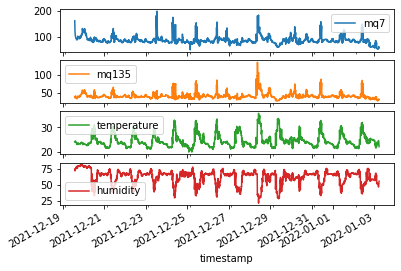

In [4]:
# plot the values against time
df.set_index("timestamp")[["mq7", "mq135", "temperature", "humidity"]].plot(subplots=True)

In [13]:
x = df[["mq7", "mq135", "temperature", "humidity"]].to_numpy()
y = df[["mq7", "mq135"]].to_numpy()

In [14]:
x[:10]

array([[162. ,  39. ,  24.1,  73. ],
       [135. ,  38. ,  23.9,  75. ],
       [118. ,  36. ,  24. ,  72. ],
       [109. ,  39. ,  24.4,  73. ],
       [102. ,  42. ,  24.2,  74. ],
       [100. ,  42. ,  24.2,  76. ],
       [ 97. ,  40. ,  24.2,  75. ],
       [ 96. ,  37. ,  24. ,  77. ],
       [ 92. ,  37. ,  23.9,  77. ],
       [ 92. ,  37. ,  23.9,  77. ]])

In [15]:
y[:10]

array([[162.,  39.],
       [135.,  38.],
       [118.,  36.],
       [109.,  39.],
       [102.,  42.],
       [100.,  42.],
       [ 97.,  40.],
       [ 96.,  37.],
       [ 92.,  37.],
       [ 92.,  37.]])

In [16]:
ts_generator = TimeseriesGenerator(x, y, length=6, sampling_rate=1, batch_size=1)
ts_generator[0]

(array([[[162. ,  39. ,  24.1,  73. ],
         [135. ,  38. ,  23.9,  75. ],
         [118. ,  36. ,  24. ,  72. ],
         [109. ,  39. ,  24.4,  73. ],
         [102. ,  42. ,  24.2,  74. ],
         [100. ,  42. ,  24.2,  76. ]]]),
 array([[97., 40.]]))

In [9]:
df

,timestamp,mq7,mq135,temperature,humidity
0,2021-12-19 14:05:25+03:00,162.0,39.0,24.1,73.0
1,2021-12-19 14:15:25+03:00,135.0,38.0,23.9,75.0
2,2021-12-19 14:25:27+03:00,118.0,36.0,24.0,72.0
3,2021-12-19 14:35:55+03:00,109.0,39.0,24.4,73.0
4,2021-12-19 14:50:28+03:00,102.0,42.0,24.2,74.0
...,...,...,...,...,...
2254,2022-01-03 05:02:50+03:00,55.0,32.0,24.6,47.0
2255,2022-01-03 05:07:57+03:00,60.0,33.0,24.2,48.0
2256,2022-01-03 05:23:17+03:00,62.0,33.0,23.8,51.0
2257,2022-01-03 05:38:36+03:00,58.0,31.0,22.7,56.0
